# Intensity Transformations

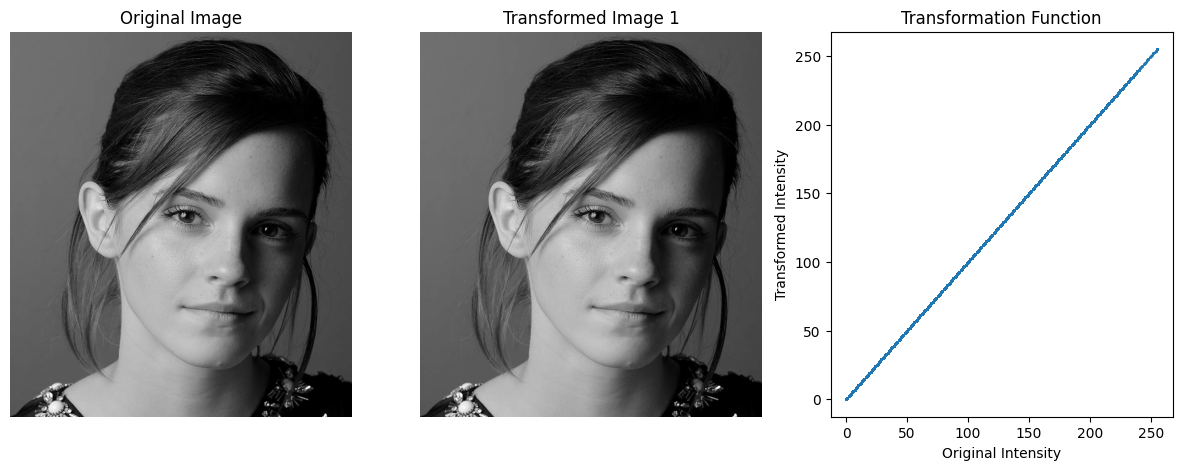

In [1]:
## Identity transformation

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
f = cv.imread('img/emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply the intensity transformation
t1 = np.arange(256, dtype=np.uint8)
g = t1[f]
# g=cv.LUT(f,t)


# Create a figure with subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the original image
ax[0].imshow(f, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Plotting the transformed image
ax[1].imshow(g, cmap='gray')
ax[1].set_title('Transformed Image 1')
ax[1].axis('off')

# Plotting the transformation function
ax[2].plot(f.flatten(), g.flatten(), '.', markersize=1)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel('Original Intensity')
ax[2].set_ylabel('Transformed Intensity')

plt.show()


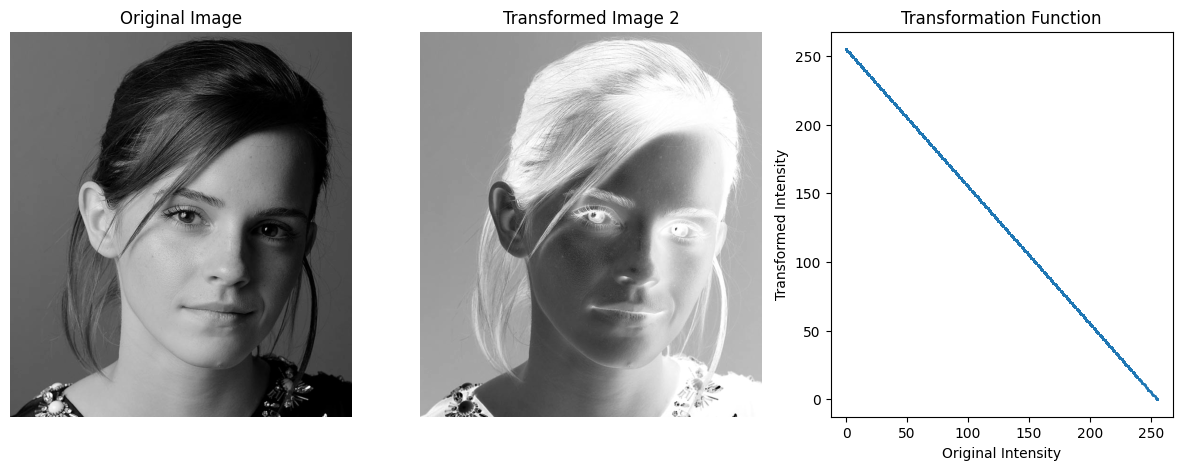

In [25]:
## Negative transformation

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
f = cv.imread('img/emma.jpg', cv.IMREAD_GRAYSCALE)

# Define the transformation function
t2 = np.arange(255, -1, -1)
h = t2[f]

# Create a figure with subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the original image
ax[0].imshow(f, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Plotting the transformed image
ax[1].imshow(h, cmap='gray')
ax[1].set_title('Transformed Image 2')
ax[1].axis('off')

# Plotting the transformation function
ax[2].plot(f.flatten(), h.flatten(), '.', markersize=1)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel('Original Intensity')
ax[2].set_ylabel('Transformed Intensity')

plt.show()


# Intensity Windowing

256


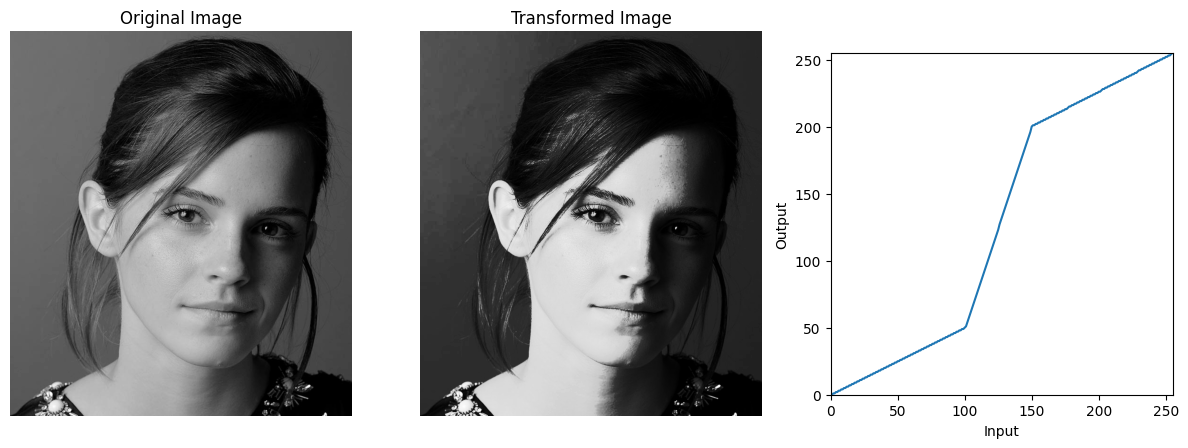

In [7]:
## Intensity Windowing

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define the intensity ranges
c=np.array([(100,50),(150,200)])

# Generate the transformation function
t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')

# Concatenate the transformation arrays
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform)) # total number of intensity values covered by the transformation function

# Read the original image
img_orig = cv.imread('img/emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply the intensity windowing transformation
image_transformed = cv.LUT(img_orig, transform)

# Display original and transformed images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_orig, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(image_transformed, cmap='gray')
axs[1].set_title('Transformed Image')
axs[1].axis('off')

# Display transformation function
axs[2].plot(transform)
axs[2].set_xlabel('Input')
axs[2].set_ylabel('Output')
axs[2].set_xlim(0,255)
axs[2].set_ylim(0,255)
axs[2].set_aspect('equal') 
plt.show()



# Gamma Correction

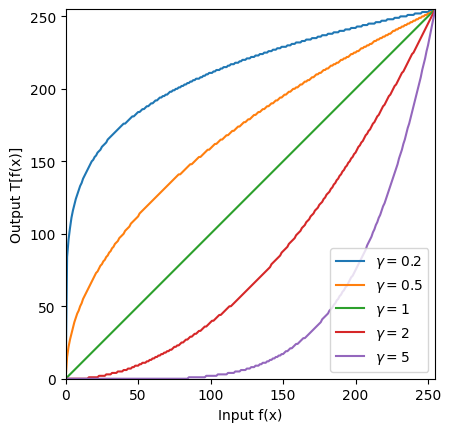

In [11]:
# Plots of Functions for Gamma Correction
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
gamma = [0.2, 0.5, 1, 2, 5]
for g in gamma:
    table = np.array([(i/255.0)**(g)*255.0 for i in np.arange(0,256)]).astype('uint8')
    ax.plot(table, label=r'$\gamma = {g}$'.format(g=g))
ax.legend(loc='best')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.set_xlabel('Input f(x)')
ax.set_ylabel('Output T[f(x)]')
plt.savefig('transform.png')
plt.show()

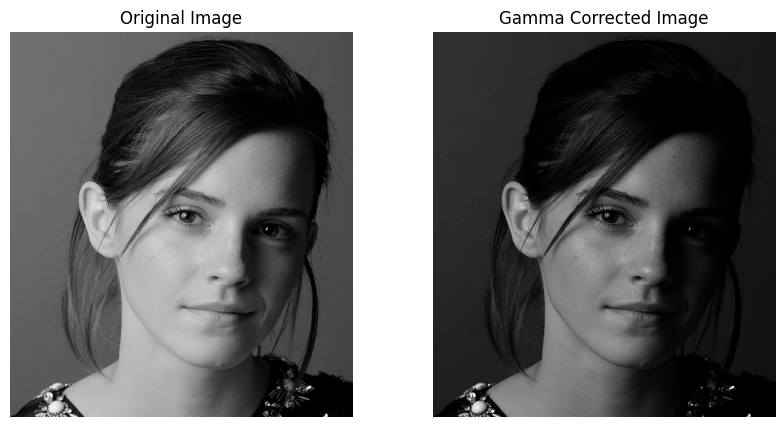

In [12]:
## Gamma Correction
## This applys a power-law function to the pixel intensities, which can effectively lighten or darken an image.

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image
f = cv.imread('img/emma.jpg', cv.IMREAD_GRAYSCALE)

# Gamma correction parameter
gamma = 2  

# Create a lookup table for gamma correction
t = np.array([(i/255.0)**gamma*255 for i in np.arange(0, 256)]).astype(np.uint8)

# Apply gamma correction using the lookup table
g = cv.LUT(f, t)

# Display original and gamma corrected images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(f, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(g, cmap='gray')
axs[1].set_title('Gamma Corrected Image')
axs[1].axis('off')
plt.show()

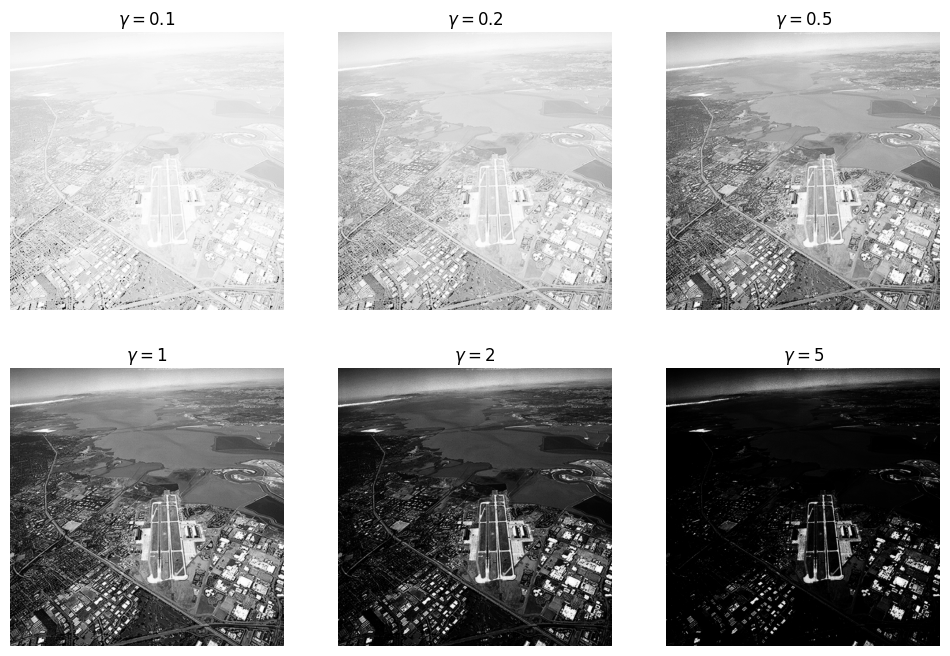

In [14]:
# gramma = 0.1, 0.2, 0.5, 1, 2, 5

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gammas = [0.1, 0.2, 0.5, 1, 2, 5]
f = cv.imread('img/city.png', cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, gamma in enumerate(gammas):
    t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype(np.uint8)
    g = cv.LUT(f, t)
    ax[i//3, i%3].imshow(g, cmap='gray', vmin=0, vmax=255)
    ax[i//3, i%3].set_title(r'$\gamma = {gamma}$'.format(gamma=gamma))
    ax[i//3, i%3].axis('off')
plt.show()

# Histogram

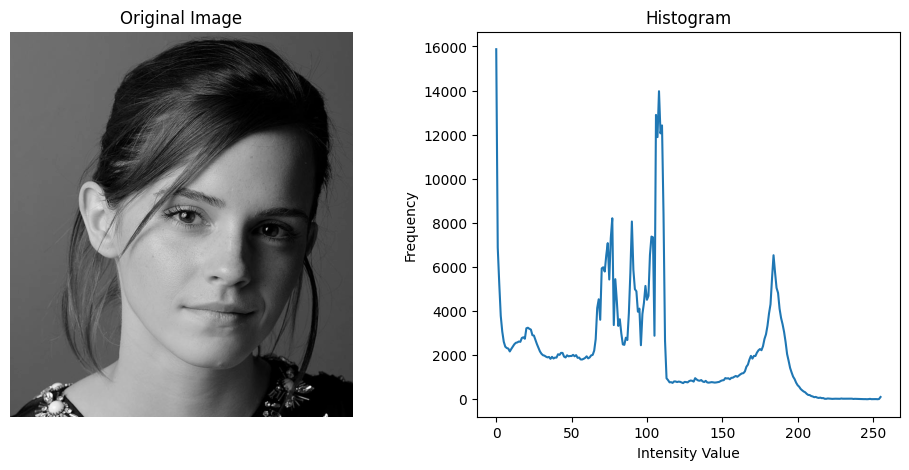

In [1]:
# Histogram Using Numpy
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('img/emma.jpg', cv.IMREAD_GRAYSCALE)
hist, bins = np.histogram(f.ravel(), 256, [0, 256])
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].plot(hist)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

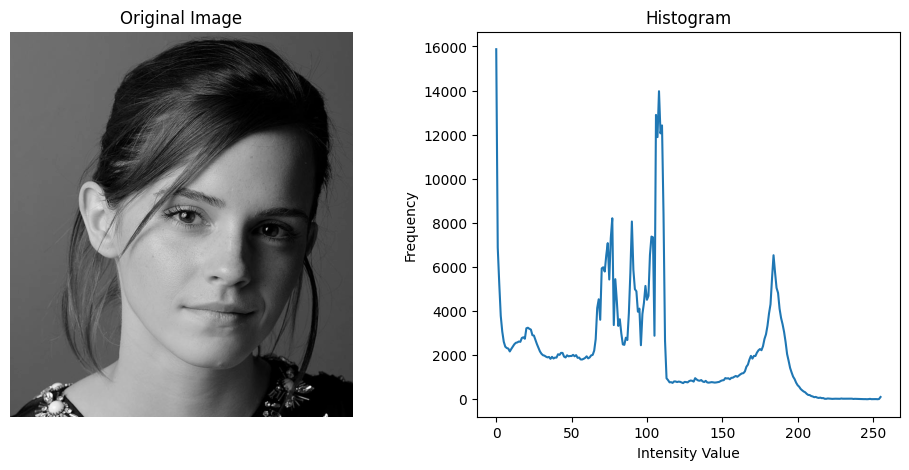

In [29]:
# Histogram Using OpenCV
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('img/emma.jpg', cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([f], [0], None, [256], [0, 256])
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].plot(hist)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

# Histogram Equalization

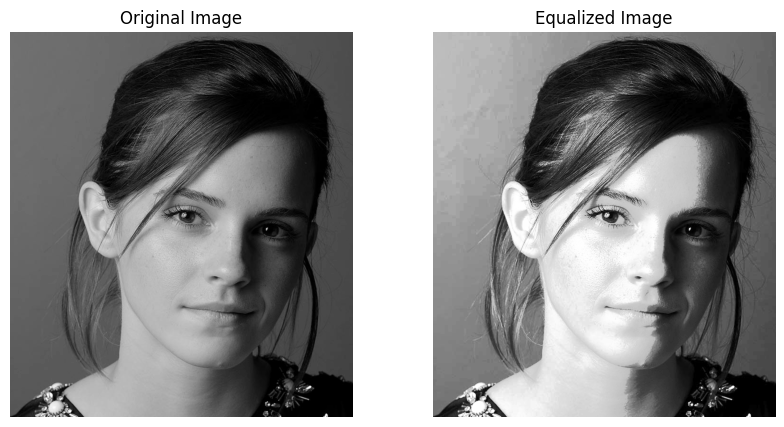

In [26]:
## Histogram Equalization Using OpenCV
## Histogram Equalization enhanceS the contrast of an image by redistributing pixel intensities.

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
f = cv.imread('img/emma.jpg', cv.IMREAD_GRAYSCALE)

# Perform histogram equalization
g = cv.equalizeHist(f)

# Display original and equalized images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(f, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(g, cmap='gray',vmin=0,vmax=255)
axs[1].set_title('Equalized Image')
axs[1].axis('off')
plt.show()



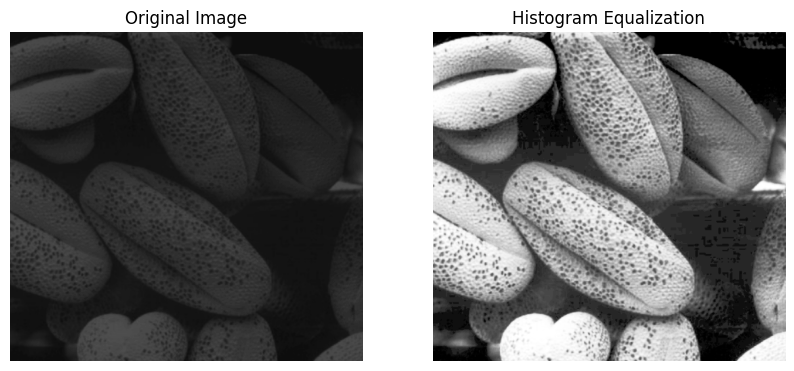

In [2]:
# Histogram Equalization on the shells Image

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('img/shells.png', cv.IMREAD_GRAYSCALE)
g = cv.equalizeHist(f)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')
plt.show()

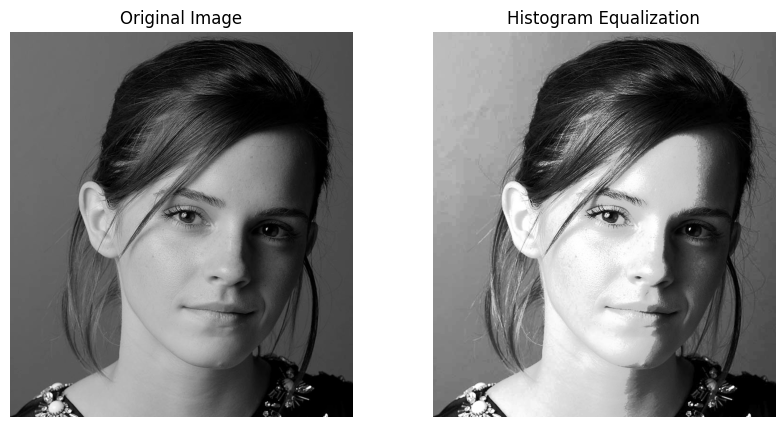

In [17]:
## Histogram Equalization Using the Formula

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
f = cv.imread('img/emma.jpg', cv.IMREAD_GRAYSCALE)

# Compute histogram
hist, bins = np.histogram(f.flatten(), 256, [0,256])

# Compute cumulative distribution function (CDF)
cdf = hist.cumsum()

# Compute transformation function T
L = 256
M, N = f.shape
t = np.array([(L-1)/(M*N)*cdf[k] for k in range(256)], dtype=np.uint8)

# Apply histogram equalization using t
g = t[f]

# Display original and histogram equalized images
g = cv.equalizeHist(f)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')
plt.show()


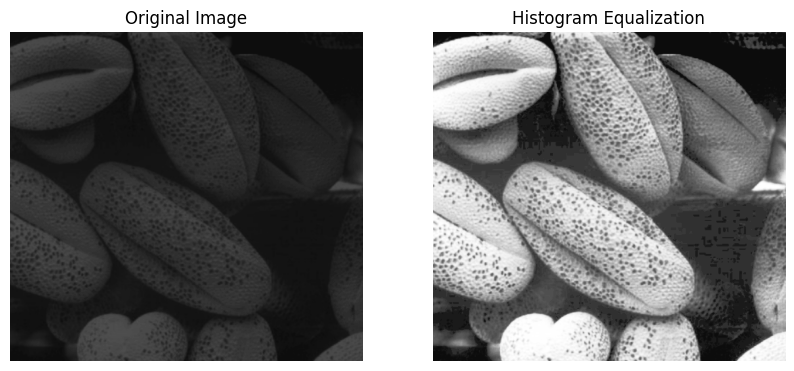

In [3]:
# Hand-Computed Intensity Transfromation
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('img/shells.png', cv.IMREAD_GRAYSCALE)
M, N = f.shape
L = 256
t = np.zeros(256, dtype=np.uint8)
hist, bins = np.histogram(f.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_min = cdf.min()
cdf_max = cdf.max()
t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)
g = t[f]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')
plt.show()

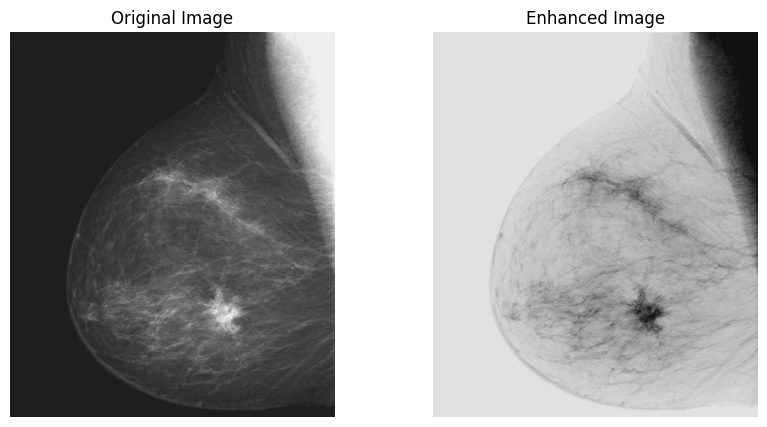

In [25]:
# Enhancing a breast Digital X-Ray Image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('img/breast.tif', cv.IMREAD_GRAYSCALE)
assert f is not None

# Negative
t = np.arange(255, -1, -1, dtype=np.uint8)
g = t[f]

# Display
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Enhanced Image')
ax[1].axis('off')
plt.show()